In [51]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
train_df = pd.read_excel('data/Data_Train.xlsx' ,engine='openpyxl')
test_df = pd.read_excel('data/Test_set.xlsx',  engine='openpyxl')

In [53]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
train_df.Duration.value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
19h 50m      1
28h 30m      1
40h 20m      1
30h 25m      1
32h 20m      1
Name: Duration, Length: 368, dtype: int64

## Preprocessing Training data

In [6]:
train_df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_df.dropna(inplace=True)

In [8]:
train_df['day_of_journey'] = pd.to_datetime(train_df.Date_of_Journey, format='%d/%m/%Y').dt.day
train_df['month_of_journey'] = pd.to_datetime(train_df.Date_of_Journey, format='%d/%m/%Y').dt.month

In [9]:
train_df['dep_hour'] = pd.to_datetime(train_df.Dep_Time).dt.hour
train_df['dep_minute'] = pd.to_datetime(train_df.Dep_Time).dt.minute

In [10]:
train_df['Arrival_hour'] = pd.to_datetime(train_df.Arrival_Time).dt.hour
train_df['Arrival_minute'] = pd.to_datetime(train_df.Arrival_Time).dt.minute

In [11]:
train_df.drop(['Arrival_Time', 'Dep_Time', 'Date_of_Journey' ], axis=1, inplace=True)

In [12]:
duration = list(train_df.Duration)
for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() +'0m'
        else:
            duration[i] = '0h' + duration[i]

duration_hours = []
duration_minutes =[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0]))
    duration_minutes.append(int(duration[i].split(sep='h')[0].split()[-1]))
    

In [13]:
train_df['duration_hours'] = duration_hours
train_df['duration_minutes'] = duration_minutes
train_df.drop(['Duration'], axis=1, inplace=True)

In [14]:
train_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,dep_hour,dep_minute,Arrival_hour,Arrival_minute,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,4


### Handle Categorical Data

In [15]:
# applying one hot encoding to the nominal variables

# 1. Airline
airline = train_df[['Airline']]
airline = pd.get_dummies(airline, drop_first=True)
airline.head()


,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [16]:
# 2. Source
source = train_df[['Source']]
source = pd.get_dummies(source, drop_first=True)
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [17]:
# 3. Destination
destination = train_df[['Destination']]
destination = pd.get_dummies(destination, drop_first=True)
destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [18]:
# Drop route and additional_info
train_df.drop(['Route', 'Additional_Info'], axis=1, inplace= True)
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,day_of_journey,month_of_journey,dep_hour,dep_minute,Arrival_hour,Arrival_minute,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,2
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,7
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,19
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,5
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,4


In [19]:
# handling ordinal data

#1. Toatal_stops
train_df.replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops': 3, '4 stops':4}, inplace=True)


In [20]:
df = pd.concat([train_df, airline, source, destination], axis=1)
df.head()

,Airline,Source,Destination,Total_Stops,Price,day_of_journey,month_of_journey,dep_hour,dep_minute,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [21]:
df.drop(['Airline', 'Source', 'De`stination'], axis=1, inplace=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10682 non-null  int64
 1   Price                                      10682 non-null  int64
 2   day_of_journey                             10682 non-null  int64
 3   month_of_journey                           10682 non-null  int64
 4   dep_hour                                   10682 non-null  int64
 5   dep_minute                                 10682 non-null  int64
 6   Arrival_hour                               10682 non-null  int64
 7   Arrival_minute                             10682 non-null  int64
 8   duration_hours                             10682 non-null  int64
 9   duration_minutes                           10682 non-null  int64
 10  Airline_Air India                          106

In [22]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [23]:
test_df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [24]:
test_df['day_of_journey'] = pd.to_datetime(test_df.Date_of_Journey, format='%d/%m/%Y').dt.day
test_df['month_of_journey'] = pd.to_datetime(test_df.Date_of_Journey, format='%d/%m/%Y').dt.month

test_df['dep_hour'] = pd.to_datetime(test_df.Dep_Time).dt.hour
test_df['dep_minute'] = pd.to_datetime(test_df.Dep_Time).dt.minute

test_df['Arrival_hour'] = pd.to_datetime(test_df.Arrival_Time).dt.hour
test_df['Arrival_minute'] = pd.to_datetime(test_df.Arrival_Time).dt.minute


test_df.drop(['Arrival_Time', 'Dep_Time', 'Date_of_Journey' ], axis=1, inplace=True)

duration = list(test_df.Duration)
for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() +'0m'
        else:
            duration[i] = '0h' + duration[i]

duration_hours = []
duration_minutes =[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0]))
    duration_minutes.append(int(duration[i].split(sep='h')[0].split()[-1]))
    
test_df['duration_hours'] = duration_hours
test_df['duration_minutes'] = duration_minutes
test_df.drop(['Duration'], axis=1, inplace=True)

# applying one hot encoding to the nominal variables

# 1. Airline
airline = test_df[['Airline']]
airline = pd.get_dummies(airline, drop_first=True)

# 2. Source
source = test_df[['Source']]
source = pd.get_dummies(source, drop_first=True)

# 3. Destination
destination = test_df[['Destination']]
destination = pd.get_dummies(destination, drop_first=True)

# Drop route and additional_info
test_df.drop(['Route', 'Additional_Info'], axis=1, inplace= True)

# handling ordinal data

#1. Total_stops
test_df.replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops': 3, '4 stops':4}, inplace=True)

test_df.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)

test_df = pd.concat([test_df, airline, source, destination], axis=1)
test_df.head()

,Total_Stops,day_of_journey,month_of_journey,dep_hour,dep_minute,Arrival_hour,Arrival_minute,duration_hours,duration_minutes,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,10,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,4,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,23,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,13,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,2,0,...,0,0,0,0,0,0,1,0,0,0


### Feature Selection

In [25]:
df.shape

(10682, 30)

In [26]:
x = df.drop('Price', axis=1)

In [27]:
y = df['Price']

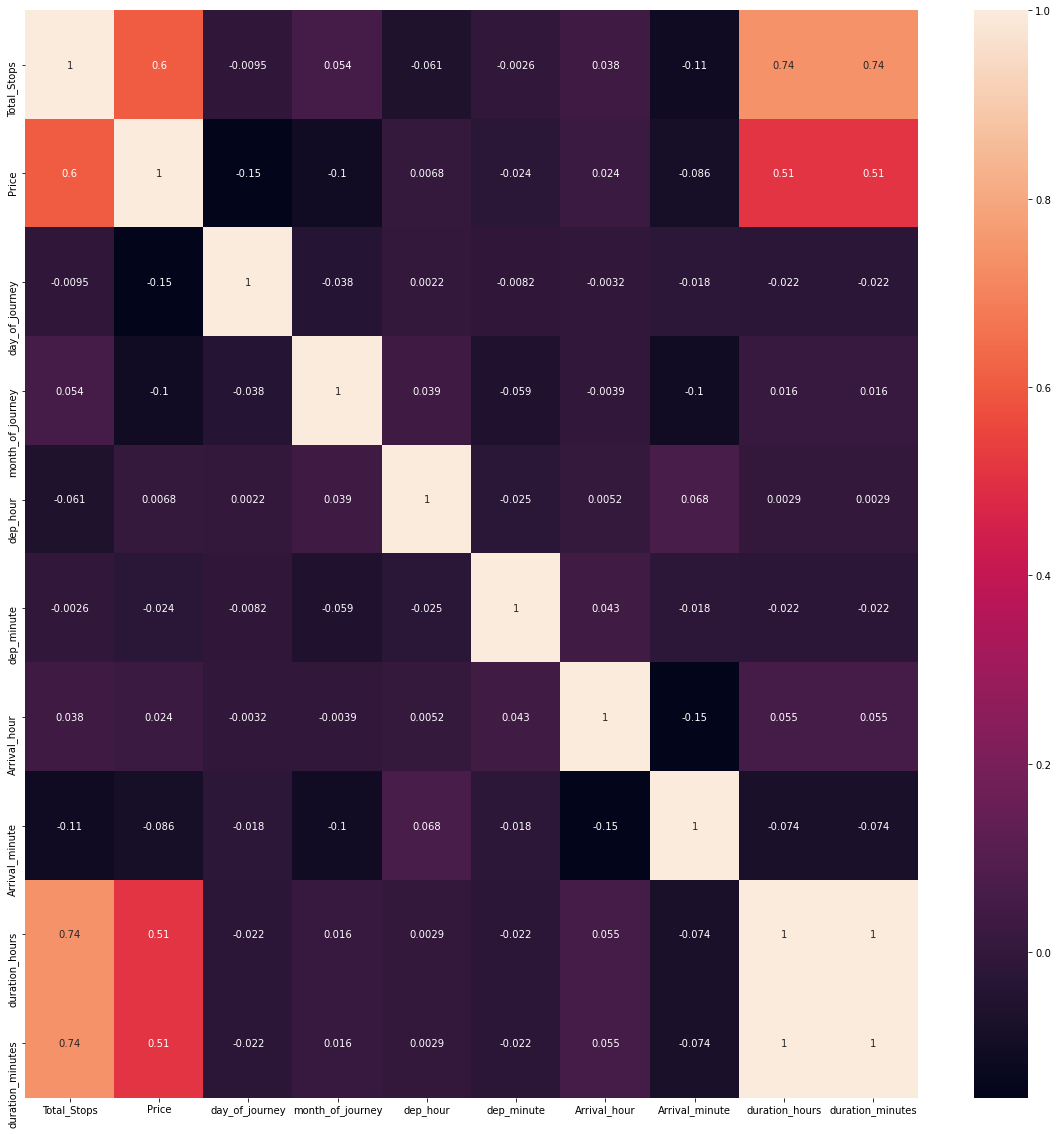

In [28]:
plt.figure(figsize=(20,20))
sns.heatmap(train_df.corr(), annot=True)
plt.show()

In [29]:
# Finding Important features

from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor()
et.fit(x, y)
et.feature_importances_

array([1.88299327e-01, 1.44012264e-01, 5.32903807e-02, 2.42054963e-02,
       2.51362200e-02, 2.85963285e-02, 2.25355849e-02, 8.06936123e-02,
       1.00415147e-01, 8.00047822e-03, 1.92710896e-03, 1.62392715e-02,
       1.35569828e-01, 6.74839569e-02, 1.80124915e-02, 8.55345080e-04,
       2.59265458e-03, 7.05951927e-05, 4.61018053e-03, 9.37194674e-05,
       5.14834271e-04, 7.07326880e-03, 3.65594962e-03, 7.54634971e-03,
       9.00452516e-03, 1.73719336e-02, 6.48801949e-03, 4.63650905e-04,
       2.52414784e-02])

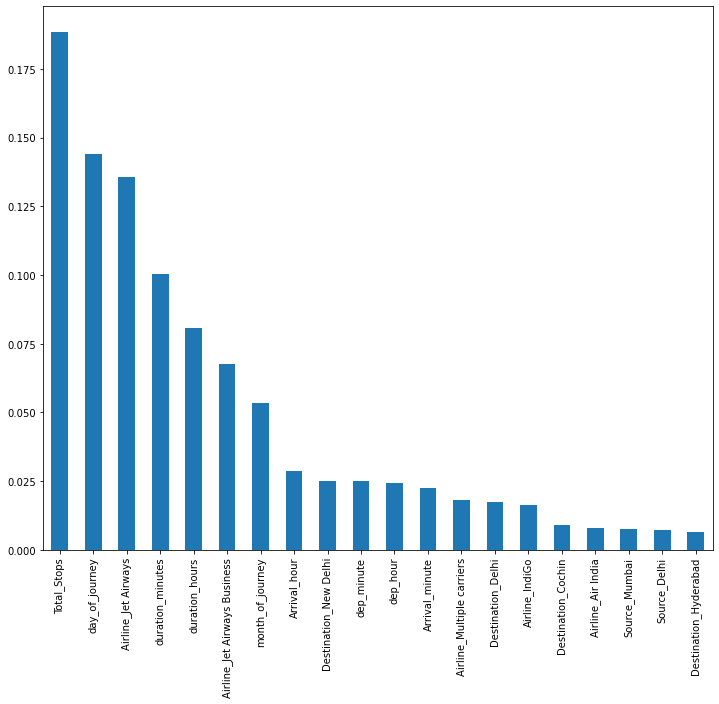

In [30]:
plt.figure(figsize=(12,10))
imp_features = pd.Series(et.feature_importances_, index=x.columns)
imp_features.nlargest(20).plot(kind='bar')
plt.show()

## Applying the model

In [31]:
# splitting the data into train and validation
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

In [32]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor()
model1.fit(xtrain, ytrain)

RandomForestRegressor()

In [33]:
rf_preds = model1.predict(xtest)

In [34]:
model1.score(xtest, ytest)

0.8159134595060835

[]

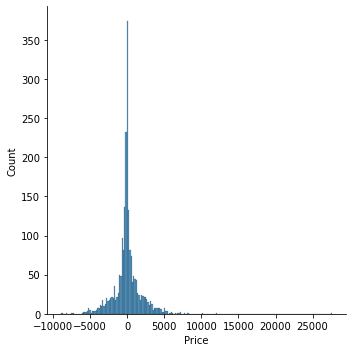

In [35]:
sns.displot(ytest-rf_preds)
plt.plot()

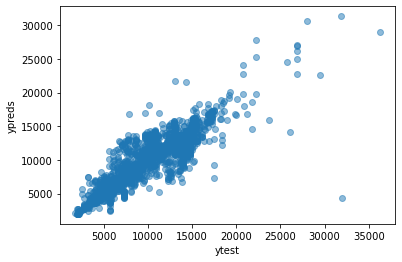

In [36]:
plt.scatter(ytest, rf_preds, alpha=0.5)
plt.xlabel('ytest')
plt.ylabel('ypreds')
plt.show()

In [37]:
from xgboost import XGBRegressor 
model2 = XGBRegressor()
model2.fit(xtrain, ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
xb_pred =model2.predict(xtest)

In [39]:
model2.score(xtest, ytest)

0.8438723638656171

[]

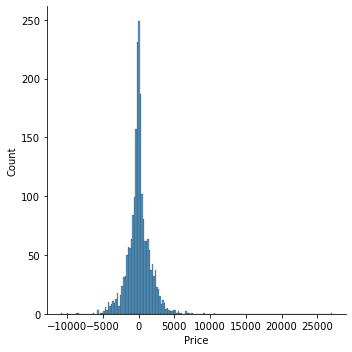

In [40]:
sns.displot(ytest-xb_pred)
plt.plot()

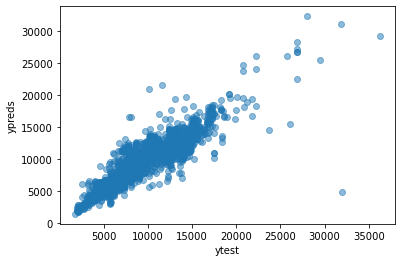

In [41]:
plt.scatter(ytest, xb_pred, alpha=0.5)
plt.xlabel('ytest')
plt.ylabel('ypreds')
plt.show()

### So we will take Xgboost as our final model and we will Hypertune it

## Hyperperameter Tuning

In [43]:
from sklearn.model_selection import RandomizedSearchCV

grid ={'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'n_estimators' : [100, 200, 500],
       'booster' : ['gbtree', 'gblinear'],
        'objective': ['reg:squarederror']}

xgb_model = XGBRegressor()

rsearch = RandomizedSearchCV(estimator = xgb_model,
                           param_distributions = grid,                       
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

rsearch.fit(xtrain,ytrain)
rsearch.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.7min finished


{'n_estimators': 500, 'max_depth': 10}

In [44]:
best_model = RandomForestRegressor(n_estimators = 500, max_depth= 10)

In [45]:
best_model.fit(xtrain, ytrain)

RandomForestRegressor(max_depth=10, n_estimators=500)

In [46]:
best_model.score(xtest, ytest)

0.8195826424061786

### Save the model

In [56]:
# import pickle
# file=open('flight_model.pkl', 'wb')
# pickle.dump(best_model, file)

model = open('flight_model.pkl','rb')
my_model = pickle.load(model)

In [57]:
my_model.predict(xtest)

array([ 4638.78971261,  7054.85215341, 10518.75857545, ...,
        3860.63914623, 14831.83615689, 12565.26709951])

In [59]:
with open("flight_model.pkl", "wb") as h:
    pickle.dump(best_model, h)

In [60]:
model = open('flight_model.pkl','rb')
my_model = pickle.load(model)

In [62]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.23.2.
